In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print('Downloading packages')
    # you should not need slycot but in case there is an error uncomment the below line
    #!pip install slycot
    !pip install control

The Continuous System is 
    5
---------
0.2 s + 1



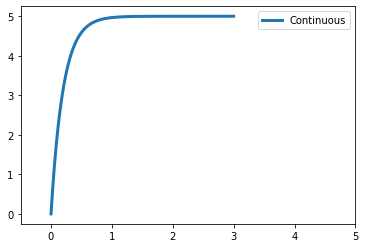

When converted to a discrete system 
   4.966
------------
z - 0.006738

dt = 1



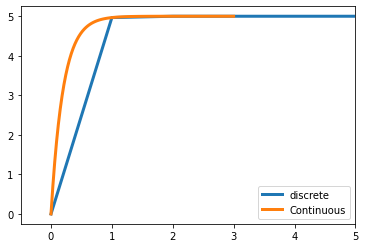

This graph does not match great what if we lower the dt
new function from c2d 
 0.02494
---------
z - 0.995

dt = 0.001



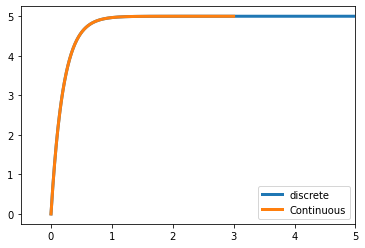

There is actually two graphs plotted here they just match so well you cant tell.This is because the dt is much lower so the function is being sampled a lot


In [2]:
from control import matlab
import control
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys = matlab.tf([5],[0.2,1])
print('The Continuous System is',sys)

t,x = control.step_response(sys,T=np.linspace(0, 3, 100))
plt.plot(t, x, label='Continuous', linewidth=3)
plt.legend()
plt.xlim(-0.5,5)
plt.show()

discrete_sys = matlab.c2d(sys,Ts = 1)
print('When converted to a discrete system',discrete_sys)
t_d,x_d = control.step_response(discrete_sys)
plt.plot(t_d, x_d, label='discrete', linewidth=3)
plt.plot(t, x, label='Continuous', linewidth=3)
plt.xlim(-0.5,5)
plt.legend()
plt.show()
print('This graph does not match great what if we lower the dt')
discrete_sys = matlab.c2d(sys,Ts = 0.001)
print('new function from c2d',discrete_sys)
t_d,x_d = control.step_response(discrete_sys)
plt.plot(t_d, x_d, label='discrete', linewidth=3)
plt.plot(t, x, label='Continuous', linewidth=3)
plt.legend()
plt.xlim(-0.5,5)
plt.show()
print('There is actually two graphs plotted here they just match so well you cant tell.' + 
     'This is because the dt is much lower so the function is being sampled a lot')


The system is 
    1
---------
0.1 s + 1

A bad discrete system is 
     1
------------
z - 4.54e-05

dt = 1

A good discrete system is 
 0.09516
----------
z - 0.9048

dt = 0.01



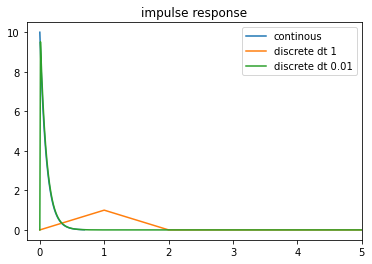

The discrete matches good but only with a low enough dt


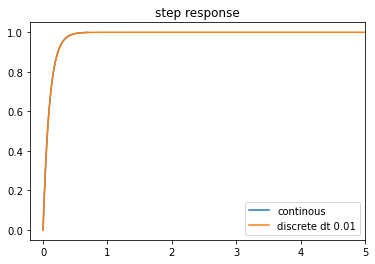

Once again the discrete matches very well to the continous to the point where its hard to tell a difference


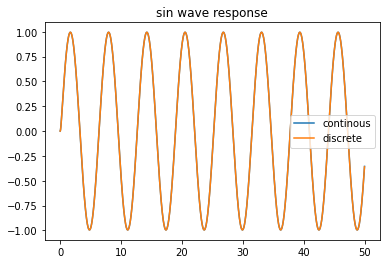

Once again continous and discrete are the same if you pick a worse dt things will not be


In [3]:
sys = control.tf([1],[0.1,1])
print('The system is',sys)

db_sys = matlab.c2d(sys,Ts=1)
print('A bad discrete system is',db_sys)

dg_sys = matlab.c2d(sys,Ts=0.01)
print('A good discrete system is',dg_sys)
#impulse
T, yout = control.impulse_response(sys)
T_db, yout_db = control.impulse_response(db_sys)
T_dg, yout_dg = control.impulse_response(dg_sys)
plt.plot(T,yout,label='continous')
plt.plot(T_db,yout_db,label='discrete dt 1')
plt.plot(T_dg,yout_dg,label='discrete dt 0.01')
plt.xlim(-0.2,5)
plt.legend()
plt.title('impulse response')
plt.show()
print('The discrete matches good but only with a low enough dt')
#step
T, yout = control.step_response(sys)
T_d, yout_d = control.step_response(dg_sys)
plt.plot(T,yout,label='continous')
plt.plot(T_d,yout_d,label='discrete dt 0.01')
plt.xlim(-0.2,5)
plt.legend()
plt.title('step response')
plt.show()
print('Once again the discrete matches very well to the continous to the point where its hard to tell a difference')
#sin
t = np.linspace(0,50,5000) # this sample rate must match dt of system of things go wrong
u = np.sin(t)
t,yout,xout = matlab.lsim(sys,u,t)
t_d,yout_d,xout_d = matlab.lsim(dg_sys,u)
plt.plot(yout, t,label='continous')
plt.plot(yout_d, t_d,label='discrete')
plt.title('sin wave response')
plt.legend()
plt.show()
print('Once again continous and discrete are the same if you pick a worse dt things will not be')


The system is 
      100
---------------
s^2 + 2 s + 100

The discrete system is 
0.004963 z + 0.00493
---------------------
z^2 - 1.97 z + 0.9802

dt = 0.01



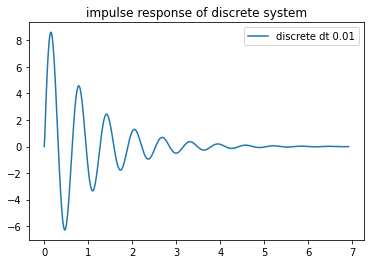

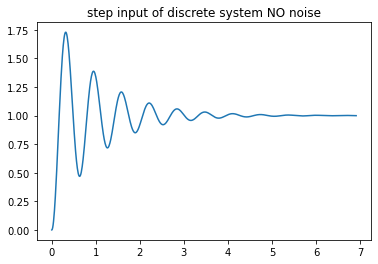

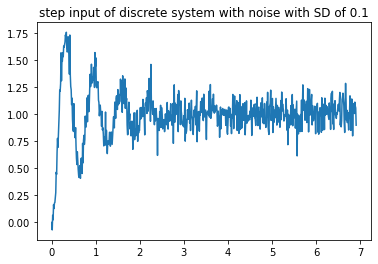

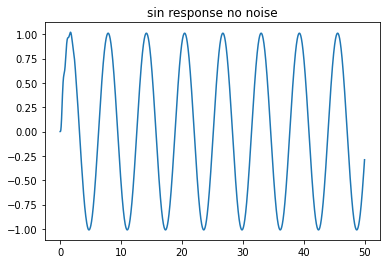

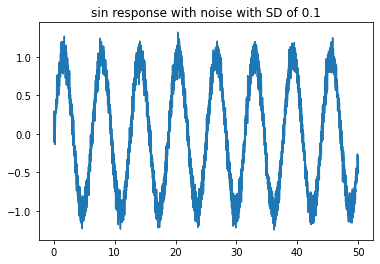

Any more noise than 0.1 is kind of a lot and you start to lose the signal


In [4]:
sys = control.tf([100],[1,2,100])
print('The system is',sys)
d_sys = matlab.c2d(sys,Ts=0.01)
print('The discrete system is',d_sys)
T_d, yout_d = control.impulse_response(d_sys)
plt.plot(T_d,yout_d,label='discrete dt 0.01')
#plt.xlim(-0.2,5)
plt.legend()
plt.title('impulse response of discrete system')
plt.show()

T_d, yout_d = control.step_response(d_sys)
noise = np.random.normal(0,0.1,len(yout_d))
plt.plot(T_d,yout_d)
plt.title('step input of discrete system NO noise')
plt.show()
#T_d = T_d + noise
yout_d = yout_d + noise
plt.plot(T_d,yout_d)
plt.title('step input of discrete system with noise with SD of 0.1')
plt.show()

t_d,yout_d,xout_d = matlab.lsim(d_sys,u)
plt.plot(yout_d,t_d)
plt.title('sin response no noise')
plt.show()
noise = np.random.normal(0,0.1,len(t_d))
t_d = t_d + noise
plt.plot(yout_d,t_d)
plt.title('sin response with noise with SD of 0.1')
plt.show()
print('Any more noise than 0.1 is kind of a lot and you start to lose the signal')
